<h1>INTERPOLATIONS</h1>

<h2>Lagrange Interpolation</h2>

<h3>The Theory</h3>

Lagrange's Method is one of the ways for data interpolation from a set of known data points. With this method, we can interpolate the value of f(x) from any value of x from within the data set. Here is the formula:

![title](img/lagrange_formula.png)

Where: <br>
<b>n</b> = the degree of polynomial (for linear n = 1, quadratic n = 2, and so on) <br>
<b>Li(x)</b> = the weighting function

To get the weighting function, the formula is:

![title](img/lag_weight_func.png)

For some people this formula might seem quite daunting or scary even. However, this formula is just the equivalent of

![title](img/lag_weight_func_exp.png)

<h3>Doing it in Python</h3>

First let's make a list of the data points we know.

In [1]:
xy_values = []

#Initialize x and y values (make sure the X values are in order)
xy_values.append([0, 0])
xy_values.append([10, 227.04])
xy_values.append([15, 362.78])
xy_values.append([20, 517.35])
xy_values.append([22.5, 602.97])
xy_values.append([30, 901.67])

xy_values

[[0, 0],
 [10, 227.04],
 [15, 362.78],
 [20, 517.35],
 [22.5, 602.97],
 [30, 901.67]]

Next let's decide on the order of polynomial to interpolate our data with. We will store it in a variable called <i>n</i>. For reference, to do a linear interpolation, we put our <i>n</i> value as 1. For quadratic <i>n</i> = 2, cubic <i>n</i> = 3, and so on.

In [2]:
n = 1

Now let's choose a value of <i>x</i> to interpolate. Obviously, the value of <i>x</i> needs to be within our known data points, otherwise we won't be able to interpolate (that would be extrapolation).

In [3]:
xVal = 16

Next we need to pick <b>two</b> points from our known data points that sandwhiches our <i>xVal</i>. We will be keeping track on the indexes. So if our <i>xVal</i> is <b>16</b>, we will be picking the x values <b>15</b> and <b>20</b> because 16 lies between them. As we see in our <i>xy_values</i> list, 15 and 20 are positioned in the indexes <b>2</b> and <b>3</b> respectively. Hence, we take a note of that in a new list.

In [4]:
def get_first2_indexes(xy_values, xVal):
    indexes = []
    for i in range(len(xy_values)-1):
        if xy_values[i][0] < xVal and xy_values[i+1][0] > xVal:
            indexes.append(i)
            indexes.append(i+1) 
    return indexes
        
indexes = get_first2_indexes(xy_values, xVal)
indexes

[2, 3]

If <i>n</i> = 1 (linear), we can go directly to finding the weighting function. However, when <i>n</i> > 1, we have to also select adjacent x values from our two chosen data points. Take note to always pick the data point closest to <i>xVal</i>.

For example when <b><i>n</i> = 3</b>:
1. Compare <b>10</b> and <b>22.5</b>
2. <b>10</b> is closer to <b>16</b> than 22.5. So we choose that.
3. <b><i>indexes</i></b> will now house [1, 2, 3]. Take note to keep track the indexes in ascending order.

For example when <b><i>n</i> = 4</b>:
1. We add one more data point from when <i>n</i> = 3.
2. Compare <b>0</b> and <b>22.5</b>
2. <b>22.5</b> is closer to <b>16</b> than 0. So we choose that.
3. <b><i>indexes</i></b> will now house [1, 2, 3, 4].

In [5]:
def get_remaining_indexes(xy_values, indexes, xVal, n):
    for _ in range(n-1):
        #find the value nearest to xVal
        leftIndex = indexes[0]-1
        rightIndex = indexes[len(indexes)-1] + 1
        #Check if the adjacent index exists in the given xy_values data
        if (leftIndex > -1):
            if (rightIndex < len(xy_values)):
                #Check which one is closer to xVal
                if (abs(xy_values[leftIndex][0] - xVal) < abs(xy_values[rightIndex][0] - xVal)):
                    indexes.insert(0, leftIndex)
                else:
                    indexes.append(rightIndex)
            else:
                indexes.insert(0, leftIndex)
        elif (rightIndex < len(xy_values)):
            indexes.append(rightIndex)

get_remaining_indexes(xy_values, indexes, xVal, n)
            
indexes

[2, 3]

Now we can go ahead and try to find the weighting functions. We will be using <b>Sympy</b> to help us keep track of variables and automatically calculate the final result. Let's start by importing Sympy library.

In [6]:
import sympy as sp

x = sp.Symbol('x');

We will now proceed in determining the weighting function. Recall that the formula is

![title](img/lag_weight_func.png)

In [7]:
def gather_weighting_functions(polynomial):
    wFunc = []      #Collection of Ln(x)
    for i in range(polynomial+1):
        subFunc = []    #Collection of individual (x - xj)/(xi-xj)
        for j in range(polynomial+1):
            #j != i
            if i != j:
                #(t - xj)/(xi-xj)
                #sub = [i, j]
                #sub[0] = xi
                #sub[1] = xj
                sub = []
                sub.append(i)
                sub.append(j)
                subFunc.append(sub)
        wFunc.append(subFunc)
        
    return wFunc

wFunc = gather_weighting_functions(n)
wFunc

[[[0, 1]], [[1, 0]]]

The code above simply stores the values i and j in each of their respective iterations.

Recall the formula for lagrange's interpolation to be

![title](img/lagrange_formula.png)

We will now put <b>fn(x)</b> together with the code below (Sympy has the benefit of automatically simplifying our otherwise very long equation):

In [8]:
def get_equation(xy_values, wFunc, indexes, x_symbol):
    total = 0
    for i in range(len(wFunc)):
        weight_function_prod = 1
        for a in range(len(wFunc[i])):
            iIndex = wFunc[i][a][0]
            index = indexes[iIndex]
            xi = xy_values[index][0]
            jIndex = wFunc[i][a][1]
            index = indexes[jIndex]
            xj = xy_values[index][0]
            sub = (x_symbol - xj)/ (xi - xj)
            weight_function_prod *= sub
        #Multiply by f(i)
        total += weight_function_prod * xy_values[indexes[i]][1]

    return sp.simplify(total)
    
equation = get_equation(xy_values, wFunc, indexes, x)
equation

30.914*x - 100.93

We are not done however, because we are interested in the value of <b>y</b> when x is our <b><i>xVal</i></b>, which is <b>16</b>. To solve this, we can call Sympy's <b>evalf()</b> function on our <i>equation</i> variable. 

In [9]:
#Solve for xVal
result = equation.evalf(subs={x : xVal})

result

393.694000000000

If we graph our findings it will look like this

y = 30.914*x - 100.93


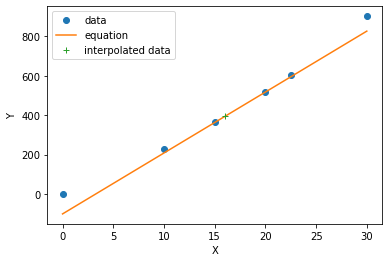

In [10]:
def graph_lagrange(xy_values, equation, xVal, result, x_symbol):
    #Graphing
    %matplotlib inline
    import matplotlib.pyplot as plt
    #split x and y
    x_values = []
    y_values = []

    for i in range(len(xy_values)):
        x_values.append(xy_values[i][0])
        y_values.append(xy_values[i][1])

    #Generate x and y
    new_x_values = []
    new_y_values = []
    for i in range(int(min(x_values) * 100), int(max(x_values) * 100), 1):
        new_x_values.append(i/100)
        new_y_values.append(equation.evalf(subs={x_symbol:i/100}))

    plt.plot(x_values, y_values, 'o', label='data')
    plt.plot(new_x_values, new_y_values, '-', label='equation')
    plt.plot([xVal], [result], '+', label="interpolated data")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")

    print("y =", equation)
    plt.show()
    
graph_lagrange(xy_values, equation, xVal, result, x)

Notice how our interpolated <i>xVal</i> lies within our predicted equation, but not all of our known data points. There are some that are relatively quite far away from the equation line. In order to reduce this, we need to use a <b>higher</b> level polynomial (a higher value for <b>n</b>). Do take note that the highest level of polynomial you can do is equal to the number of data points you have minus 1. This is because you do not have enough data points to use a higher degree polynomial.

<h3>Try it Yourself!</h3>

Try experimenting with Lagrange's Interpolation yourself with your own data inputs. <br>
Let's start with the data points that you know:

In [11]:
xy_values = []

#Initialize x and y values (make sure the X values are in order)
xy_values.append([0, 0])
xy_values.append([10, 227.04])
xy_values.append([15, 362.78])
xy_values.append([20, 517.35])
xy_values.append([22.5, 602.97])
xy_values.append([30, 901.67])

xy_values

[[0, 0],
 [10, 227.04],
 [15, 362.78],
 [20, 517.35],
 [22.5, 602.97],
 [30, 901.67]]

Now for what value of x do you want to find?

In [12]:
xVal = 16
xVal

16

And what order of polynomial would you like to use? <br>
Note: Be sure to set your value of <b>n</b> to be the amount of data points -1. If you have 6 data points, your max value for <b>n</b> is 5.

In [13]:
n = 3    #Order/degree of polynomial
#n = len(xy_values) - 1  #Use this to use the highest possible degree of polynomial
n

3

Your inputs are now in! (Don't change anything in the code below)

In [14]:
import sympy as sp

x = sp.Symbol('x');

indexes = get_first2_indexes(xy_values, xVal)
get_remaining_indexes(xy_values, indexes, xVal, n)
wFunc = gather_weighting_functions(n)
equation = get_equation(xy_values, wFunc, indexes, x)
result = equation.evalf(subs={x : xVal})

TypeError: get_first2_indexes() missing 2 required positional arguments: 'xy_values' and 'xVal'

The code has been baked and here is the result!

In [ ]:
result

Now let's see how that looks like in a graph.

In [ ]:
graph_lagrange(xy_values, equation, xVal, result, x)

How did your graph turn out? Were you able to line up your known data points with your equation line? Maybe try with a higher value of n, or try with an entire different data set. Play around!

<h2>Newton Interpolation</h2>

<h3>The Theory</h3>

<h3>Solving it with Python</h3>

Similar to what we did in Lagrange's, we first make a list of the data points we know.

In [ ]:
xy_values = []

#Initialize x and y values (make sure the X values are in order)
xy_values.append([0, 0])
xy_values.append([10, 227.04])
xy_values.append([15, 362.78])
xy_values.append([20, 517.35])
xy_values.append([22.5, 602.97])
xy_values.append([30, 901.67])

The beauty with Newton's method is that we do not need to specify what order of polynomial we want to use. That is determined by the divided difference table, so let's create that.

In [ ]:
#Initialize divided difference table
table = []

for _ in range(len(xy_values)):
    temp = []
    for _ in range(len(xy_values) + 1):
        temp.append(-1)
    table.append(temp)
        
#Insert x and y values to table
for i in range(len(xy_values)):
    table[i][0] = xy_values[i][0]
    table[i][1] = xy_values[i][1]
    
table

We first initialize an empty table by flagging all values with -1. Then we insert our known x and y values there. Next we calculate the table and fill in the remaining empty cells.

In [ ]:
#Do the divided difference table
y_bound = 1
for col in range(2, len(table[0])):
    for row in range(y_bound, len(table)):
        try:
            delta = (table[row][col-1] - table[y_bound-1][col-1]) / (table[row][0] - table[y_bound-1][0])
        except:
            delta = 0
        table[row][col] = delta
    y_bound += 1
table

In [ ]:
#Get an values
an = []
col = 1
for row in range(0, len(table)):
    an.append(table[row][col])
    col += 1

In [ ]:
#create function and simplify it
x = sp.Symbol('x')
func = 0
for a in range(len(an)):
    product = an[a]
    for i in range(a):
        product *= (x - xy_values[i][0])
    func += product

func = sp.simplify(func)

func

In [ ]:
#Graphing
%matplotlib inline
import matplotlib.pyplot as plt
#split x and y
x_values = []
y_values = []

for i in range(len(xy_values)):
    x_values.append(xy_values[i][0])
    y_values.append(xy_values[i][1])

#Generate x and y
new_x_values = []
new_y_values = []
for i in range(int(min(x_values) * 100), int(max(x_values) * 100), 1):
    new_x_values.append(i/100)
    new_y_values.append(func.evalf(subs={x:i/100}))
    
plt.plot(x_values, y_values, 'o', label='data')
plt.plot(new_x_values, new_y_values, '-', label='equation')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

print("y =", func)
plt.show()